# 文本分类
本专题将提供一份80万条经过脱敏处理的短信数据，其中包含大量垃圾短信信息，数据由3个字段构成，分别是”短信id"、"是否垃圾短信"(0代表常规短信，1代表垃圾短信)和”短信文本内容”。任务要求采用朴素贝叶斯模型或其他分类模型，对垃圾短信进行分类。主要步骤可包括:  
1.数据读取  
2.文本预处理。对原始数据进行预处理，如去重、脱敏和分词等操作，然后进行词频统计，分别统计垃圾短信和非垃圾短信的词频分布情况，可用相应的可视化形式呈现(如词云) 。本题提供的数据量较大，有80万条,如实验条件有限，可考虑对数据进行采用，比如抽取5-10万条进行模型训练与分类分类。  
3.分类。可采用自定义的朴素贝叶斯模型，也可以调用第三方工具，如sci-learn等库内置函数进行分类  
4.模型评价。根据划定的测试集进行预测，对比真实值与预测值，获得准确率，并进行结果分析。  

In [1]:
import pandas as pd
# 数据读取 数据有三列，第一列为序号，第二列为标签，第三列为文本内容
def read_csv(path):
    data = pd.read_csv(path, header=None, names=['id', 'label', 'text'])
    return data

In [2]:
file_name = '实训专题4/message80W.csv'
data = read_csv(file_name)
data['text'][0:5]

0                        商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1    南口阿玛施新春第一批限量春装到店啦         春暖花开淑女裙、冰蓝色公主衫  ...
2                                     带给我们大常州一场壮观的视觉盛宴
3                                        有原因不明的泌尿系统结石等
4                                      23年从盐城拉回来的麻麻的嫁妆
Name: text, dtype: object

In [3]:
# 数据预处理
import re

# 去除文本中的标点符号
def remove_punctuation(line):
    line = str(line)
    if line.strip() == '':
        return ''
    # 除中文、字母、数字外的字符全部替换为''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    # 将正则表达式rule对line进行替换，并返回替换后的值
    line = rule.sub('', line)
    return line

remove_punctuation('南口阿玛施新春第一批限量春装到店啦         春暖花开淑女裙、冰蓝色公主衫   气质粉小西装、冰丝女王长半裙、   皇')

'南口阿玛施新春第一批限量春装到店啦春暖花开淑女裙冰蓝色公主衫气质粉小西装冰丝女王长半裙皇'

In [20]:
# 数据清洗
def clean_data(data):
    # 去除重复文本
    data['text'] = data['text'].drop_duplicates()
    # 去除文本中的x序列
    data['text'] = data['text'].apply(lambda x: re.sub('x', '', x))
    return data

data = clean_data(data)
data['text'][0:5]

0                          商业秘密 秘密性 维系 商业价值 垄断 地位 前提条件
1    南口 阿玛施 新春 第一批 限量 春装 店 春暖花开 淑女 裙冰 蓝色 公主 衫 气质 粉小...
2                                    带给 常州 一场 壮观 视觉 盛宴
3                                        原因 不明 泌尿系统 结石
4                                    23 年 盐城 拉回来 麻麻 嫁妆
Name: text, dtype: object

In [4]:
# 读入停用词表
stopword_path = '实训专题4/stopword.txt'
def read_stopword(stopword_path):
    with open(stopword_path, 'r', encoding='gbk') as f:
        stopword = f.readlines()
        stopword = [stopword[0].replace('\n', '')] + [line.strip() for line in stopword[1:]]
    return stopword

stopword = read_stopword(stopword_path)
stopword[0:100]

[' ',
 '】',
 '【',
 ',',
 '!',
 '会',
 '的',
 '日',
 '月',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①']

In [14]:
# 分词且去除停用词
import jieba


def cut_words(data):
    data['text'] = data['text'].apply(remove_punctuation)
    data['text'] = data['text'].apply(lambda x: ' '.join(
        [w for w in list(jieba.cut(x)) if (w not in stopword and 'x' not in w)]))
    return data


data = cut_words(data)
data[560:570]


,id,label,text
560,561,0,六安 商业地产 新篇章
561,562,0,食用 枸杞 朋友 产 枸杞
562,563,0,做爱 爱爱 视频 看片 国产 欧美 偷拍 网络红人 嫩 模日 韩宅 男 撸 永久
563,564,0,同学 手机号 转移
564,565,1,媛 色 妇女 感恩 回馈 美容 美甲 睫毛 嫁接 门店 项目 折仅 天 朋友 买单 天 享受...
565,566,0,我市 系列 活动 庆祝 全民 健身
566,567,0,岁 湖北 少年 抢劫 长沙 金店 公平
567,568,0,图为 淮安市 淮安 区 消防队 申通 快递 物流 公司 组织 消防 演练
568,569,0,认证 信息 浙江 正泰 电器 股份 有限公司 邹林
569,570,0,腾讯 阿里巴巴 网易 老牌 互联网 企业 并驾齐驱 游戏 互娱 行业 新生 巨头


In [15]:
# 词频统计 分别统计label为1(垃圾信息)和label为0(⾮垃圾短信)的词频分布情况
from collections import Counter

def word_count(data):
    # 统计label为1的词频
    spam_data = data[data['label'] == 1]
    spam_words = []
    for line in spam_data['text']:
        spam_words.extend(line.split(' '))
    spam_word_count = Counter(spam_words)
    # 统计label为0的词频
    ham_data = data[data['label'] == 0]
    ham_words = []
    for line in ham_data['text']:
        ham_words.extend(line.split(' '))
    ham_word_count = Counter(ham_words)
    return spam_word_count, ham_word_count

spam_word_count, ham_word_count = word_count(data)

In [18]:
spam_word_count.most_common(10), ham_word_count.most_common(10)

([('元', 21855),
  ('活动', 18652),
  ('送', 14039),
  ('号', 12631),
  ('您好', 11288),
  ('优惠', 10285),
  ('折', 9935),
  ('公司', 7001),
  ('地址', 6935),
  ('全场', 6725)],
 [('手机', 31379),
  ('年', 23573),
  ('说', 17575),
  ('南京', 17330),
  ('电脑', 16795),
  ('飞机', 16483),
  ('中国', 15471),
  ('中', 12486),
  ('百度', 11393),
  ('浙江', 11292)])

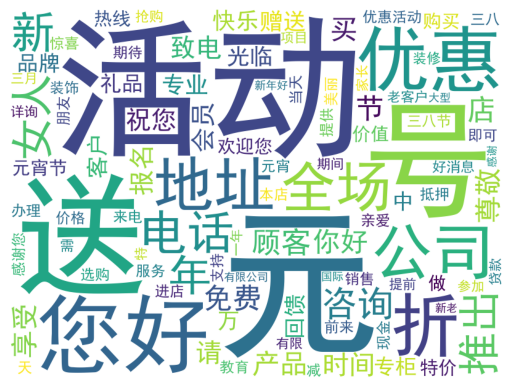

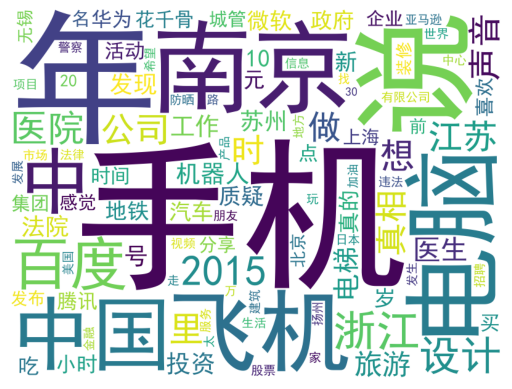

In [17]:
# 词云展示
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def word_cloud(word_count):
    # mask = np.array(Image.open('ham.jpg'))
    wc = WordCloud(font_path='simhei.ttf', background_color='white', max_words=100, width=800, height=600,)
    wc.generate_from_frequencies(word_count)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

word_cloud(spam_word_count)
word_cloud(ham_word_count)

In [9]:
from sklearn.model_selection import train_test_split
# 数据划分
def split_data(data):
    x_train, x_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(data)
x_train[0:5]

647463    包括 xxxxx 栋 房子 xxxxx 辆车
391927         naturebounty168 元
93166     检查 各类 医疗卫生 机构 600 余户 次
550970          评估 活动 形式 内容 多种多样
503627         加州 Staples 球场 NBA
Name: text, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 特征提取
def feature_extraction(x_train, x_test):
    vectorizer = TfidfVectorizer(max_features=5000)
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    return x_train, x_test

x_train, x_test = feature_extraction(x_train, x_test)

In [11]:
from sklearn.preprocessing import LabelEncoder
# 标签编码
def label_encode(y_train, y_test):
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)
    return y_train, y_test

y_train, y_test = label_encode(y_train, y_test)

In [12]:
# 模型训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 训练模型
model = MultinomialNB()
model.fit(x_train, y_train)

# 模型评估
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# 模型保存
import joblib
joblib.dump(model, 'model.pkl')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    143936
           1       0.93      0.90      0.91     16064

    accuracy                           0.98    160000
   macro avg       0.96      0.95      0.95    160000
weighted avg       0.98      0.98      0.98    160000



['model.pkl']